# Importing Libraries

In [1]:
import sys
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import pathlib
import warnings
import glob
import seaborn as sns
import zipfile
import shutil
warnings.filterwarnings("ignore")

# Defining paths

In [2]:
# Deffining directories
current_dir = pathlib.Path().absolute()
fa_dir = current_dir.parents[0].joinpath('src')

# Importing fish_analyses module
sys.path.append(str(fa_dir))
import fish_analyses as fa

# Local folder path
local_folder_path = pathlib.Path().absolute().joinpath('temp_zip_analyses')
local_folder_path

# Path to credentials
desktop_path = pathlib.Path.home()/'Desktop'

# Connection to munsky-nas
path_to_config_file = desktop_path.joinpath('config.yml')
share_name = 'share'


# List of folders to process

In [3]:
def dusp__dirs(mandatory_substring):
    list_dirs=(
    'smFISH_images/Eric_smFISH_images/20220126/DUSP1_Dex_0min' ,
    'smFISH_images/Eric_smFISH_images/20220126/DUSP1_Dex_10min' ,
    'smFISH_images/Eric_smFISH_images/20220126/DUSP1_Dex_20min' ,
    'smFISH_images/Eric_smFISH_images/20220126/DUSP1_Dex_30min' ,
    'smFISH_images/Eric_smFISH_images/20220126/DUSP1_Dex_40min' ,
    'smFISH_images/Eric_smFISH_images/20220131/DUSP1_Dex_50min' ,
    'smFISH_images/Eric_smFISH_images/20220131/DUSP1_Dex_60min' ,
    'smFISH_images/Eric_smFISH_images/20220131/DUSP1_Dex_75min' ,
    'smFISH_images/Eric_smFISH_images/20220131/DUSP1_Dex_90min' ,
    'smFISH_images/Eric_smFISH_images/20220131/DUSP1_Dex_120min' ,
    'smFISH_images/Eric_smFISH_images/20220131/DUSP1_Dex_150min' ,
    'smFISH_images/Eric_smFISH_images/20220131/DUSP1_Dex_180min' )
    list_labels = [ 'wo','10min','20min','30min','40min','50min','60min','75min','90min','120min','150min','180min']
    plot_title_subfix= "DUSP1_Dex"
    mandatory_substring = mandatory_substring #'nuc_100__cyto_220__psfz_300__psfyx_105'
    return list_dirs, list_labels, plot_title_subfix, mandatory_substring

In [4]:
def IL_R2_list(mandatory_substring):
    list_dirs=(
    'smFISH_images/Linda_smFISH_images/Confocal/20220214/GAPDH-Cy3_NFKBIA-Cy5_WO_10ng_mL_IL-1B_Rep2' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220214/GAPDH-Cy3_NFKBIA-Cy5_5min_10ng_mL_IL-1B_Rep2' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220209/GAPDH-Cy3_NFKBIA-Cy5_10min_10ng_mL_IL-1B_Rep2' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220209/GAPDH-Cy3_NFKBIA-Cy5_15min_10ng_mL_IL-1B_Rep2' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220209/GAPDH-Cy3_NFKBIA-Cy5_20min_10ng_mL_IL-1B_Rep2' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220207/GAPDH-Cy3_NFKBIA-Cy5_30min_10ng_mL_IL-1B_Rep2' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220207/GAPDH-Cy3_NFKBIA-Cy5_1h_10ng_mL_IL-1B_Rep2' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220207/GAPDH-Cy3_NFKBIA-Cy5_2h_10ng_mL_IL-1B_Rep2' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220207/GAPDH-Cy3_NFKBIA-Cy5_3h_10ng_mL_IL-1B_Rep2' ) 
    list_labels = [ 'wo','5min','10min','15min','20min','30min','1h', '2h','3h']
    plot_title_subfix= "GAPDH-Cy3_NFKBIA-Cy5_IL-1B_Rep2"
    mandatory_substring = mandatory_substring   #'nuc_100__cyto_220__psfz_350__psfyx_120'
    return list_dirs, list_labels, plot_title_subfix, mandatory_substring

In [5]:
def IL_R1_list(mandatory_substring):
    list_dirs=(
    'smFISH_images/Linda_smFISH_images/Confocal/20220125/GAPDH-Cy3_NFKBIA-Cy5_WO_IL-1B',
    'smFISH_images/Linda_smFISH_images/Confocal/20220203/GAPDH-Cy3_NFKBIA-Cy5_5min_10ng_mL_IL-1B' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220127/GAPDH-Cy3_NFKBIA-Cy5_10min_10ng_mL_IL-1B' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220125/GAPDH-Cy3_NFKBIA-Cy5_15min_10ng_mL_IL-1B' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220125/GAPDH-Cy3_NFKBIA-Cy5_20min_10ng_mL_IL-1B' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220124/GAPDH-Cy3_NFKBIA-Cy5_30min_10ng_mL_IL-1B' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220124/GAPDH-Cy3_NFKBIA-Cy5_1h_10ng_mL_IL-1B' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220124/GAPDH-Cy3_NFKBIA-Cy5_2h_10ng_mL_IL-1B' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220124/GAPDH-Cy3_NFKBIA-Cy5_3h_10ng_mL_IL-1B' ) 
    list_labels = [ 'wo','5min','10min','15min','20min','30min','1h', '2h','3h']
    plot_title_subfix= "GAPDH-Cy3_NFKBIA-Cy5_IL-1B_Rep1"
    mandatory_substring = mandatory_substring    #'nuc_100__cyto_220__psfz_350__psfyx_120'
    return list_dirs, list_labels, plot_title_subfix, mandatory_substring

In [6]:
def Dex_R1_list(mandatory_substring):
    list_dirs=(
    'smFISH_images/Linda_smFISH_images/Confocal/20220114/GAPDH-Cy3_NFKBIA-Cy5_woDex' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220121/GAPDH-Cy3_NFKBIA-Cy5_5min_100nMDex' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220121/GAPDH-Cy3_NFKBIA-Cy5_10min_100nMDex' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220124/GAPDH-Cy3_NFKBIA-Cy5_15min_100nMDex' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220124/GAPDH-Cy3_NFKBIA-Cy5_30min_100nMDex' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220117/GAPDH-Cy3_NFKBIA-Cy5_1h_100nMDex' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220114/GAPDH-Cy3_NFKBIA-Cy5_2h_100nMDex' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220117/GAPDH-Cy3_NFKBIA-Cy5_4h_100nMDex' )
    list_labels = [ 'wo','5min','10min','15min','30min','1h', '2h','4h']
    plot_title_subfix= "GAPDH-Cy3_NFKBIA-Cy5_100nMDex_Rep1"
    mandatory_substring = mandatory_substring       #'nuc_100__cyto_220__psfz_350__psfyx_120'
    return list_dirs, list_labels, plot_title_subfix, mandatory_substring

In [7]:
def Dex_R2_list(mandatory_substring):
    list_dirs=(    
    'smFISH_images/Linda_smFISH_images/Confocal/20220214/GAPDH-Cy3_NFKBIA-Cy5_WO_DEX_Rep2' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220216/GAPDH-Cy3_NFKBIA-Cy5_5min_100nM_DEX_Rep2' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220216/GAPDH-Cy3_NFKBIA-Cy5_10min_100nM_DEX_Rep2' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220216/GAPDH-Cy3_NFKBIA-Cy5_15min_100nM_DEX_Rep2' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220215/GAPDH-Cy3_NFKBIA-Cy5_30min_100nM_DEX_Rep2' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220214/GAPDH-Cy3_NFKBIA-Cy5_1h_100nM_DEX_Rep2' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220214/GAPDH-Cy3_NFKBIA-Cy5_2h_100nM_DEX_Rep2' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220214/GAPDH-Cy3_NFKBIA-Cy5_4h_100nM_DEX_Rep2' )
    list_labels = [ 'wo','5min','10min','15min','30min','1h', '2h','4h']
    plot_title_subfix= "GAPDH-Cy3_NFKBIA-Cy5_100nM_DEX_Rep2"
    mandatory_substring = mandatory_substring      #'nuc_100__cyto_220__psfz_350__psfyx_120'
    return list_dirs, list_labels, plot_title, mandatory_substring

# Establishing connection to NAS and downloading zip files.

In [8]:
def read_zipfiles_from_NAS(list_dirs,path_to_config_file,share_name,mandatory_substring,local_folder_path):
    # This function iterates over all zip files in a remote directory and download them to a local directory
    list_remote_files=[]
    list_local_files =[]
    for folder in list_dirs:
        list_files = fa.NASConnection(path_to_config_file,share_name = share_name).read_files(folder,timeout=60)
        for file in list_files:
            if ('.zip' in file) and (mandatory_substring in file):   # add an argument with re conditions 
                # Listing all zip files
                zip_file_path = pathlib.Path().joinpath(folder,file)
                list_remote_files.append (zip_file_path)
                list_local_files.append(pathlib.Path().joinpath(local_folder_path,zip_file_path.name)) 
                # downloading the zip files from NAS
                fa.NASConnection(path_to_config_file,share_name = share_name).download_file(zip_file_path, local_folder_path,timeout=200)
    return list_local_files



# Unzipping Files

In [9]:
def unzip_local_folders(list_local_files,local_folder_path):
    list_local_folders =[]
    for zip_folder in list_local_files:
        # Reads from a list of zip files
        file_to_unzip = zipfile.ZipFile(str(zip_folder)) # opens zip
        temp_folder_name = pathlib.Path().joinpath(local_folder_path, zip_folder.stem)
        if (os.path.exists(temp_folder_name)) :
            shutil.rmtree(temp_folder_name)
            os.makedirs(temp_folder_name) # make a new directory
        # Iterates for each file in zip file
        for file_in_zip in file_to_unzip.namelist():
            # Extracts data to specific folder
            file_to_unzip.extract(file_in_zip,temp_folder_name)
        # Closes the zip file
        file_to_unzip.close()
        # removes the original zip file
        os.remove(pathlib.Path().joinpath(local_folder_path, zip_folder.name))
        list_local_folders.append(temp_folder_name)
    return list_local_folders


In [21]:
def dataframe_extract_data(dataframe,spot_type_selected = 0, minimal_TS_size=5):
    ''' This function is intended to read a dataframe and returns 
        number_of_spots_per_cell, number_of_spots_per_cell_cytosol, number_of_spots_per_cell_nucleus, number_of_TS_per_cell, ts_size, cell_size
    '''
    number_cells = dataframe['cell_id'].nunique()
    # Number of spots
    number_of_spots_per_cell = np.asarray([len( dataframe.loc[  (dataframe['cell_id']==i)  & (dataframe['spot_type']==spot_type_selected) ].spot_id) for i in range(0, number_cells)])
    # Number of spots in cytosol
    number_of_spots_per_cell_cytosol = np.asarray([len( dataframe.loc[  (dataframe['cell_id']==i) & (dataframe['is_nuc']==False) & (dataframe['spot_type']==spot_type_selected) ].spot_id) for i in range(0, number_cells)])
    # Number of spots in nucleus.  Spots without TS.
    number_of_spots_per_cell_nucleus = np.asarray([len( dataframe.loc[  (dataframe['cell_id']==i) &  (dataframe['is_cluster']==False) & (dataframe['is_nuc']==True) & (dataframe['spot_type']==spot_type_selected)    ].spot_id) for i in range(0, number_cells)])
    # Total number of spots. TS + spots
    total_of_spots_per_cell_nucleus = np.asarray([len( dataframe.loc[  (dataframe['cell_id']==i) & (dataframe['spot_type']==spot_type_selected)    ].spot_id) for i in range(0, number_cells)])
    # Number of TS per cell.
    number_of_TS_per_cell = [len( dataframe.loc[  (dataframe['cell_id']==i) &  (dataframe['is_cluster']==True) & (dataframe['is_nuc']==True) & (dataframe['spot_type']==spot_type_selected) & (dataframe['cluster_size'] >=4) ].spot_id) for i in range(0, number_cells)]
    number_of_TS_per_cell= np.asarray(number_of_TS_per_cell)
    number_of_TS_per_cell[number_of_TS_per_cell<minimal_TS_size] = 0
    #number_of_TS_per_cell=number_of_TS_per_cell[number_of_TS_per_cell>minimal_TS_size]   
    # Number of RNA in a TS
    ts_size =  dataframe.loc[   (dataframe['is_cluster']==True) & (dataframe['is_nuc']==True)  & (dataframe['spot_type']==spot_type_selected)   ].cluster_size.values
    # Size of each cell
    cell_size = np.asarray([len( dataframe.loc[  (dataframe['cell_id']==i) & (dataframe['spot_type']==0)].cell_area_px.values) for i in range(0, number_cells)])
    return number_of_spots_per_cell, number_of_spots_per_cell_cytosol, number_of_spots_per_cell_nucleus, number_of_TS_per_cell, ts_size,cell_size, number_cells, total_of_spots_per_cell_nucleus


In [19]:
def extracting_data_for_each_df_in_directory(data_dir,minimal_TS_size):
    '''
    '''
    # Extracting data from dataframe and converting it into lists for each directory.
    list_spots_total=[]
    list_spots_nuc=[]
    list_spots_cytosol=[]
    list_number_cells =[]
    list_transcription_sites =[]
    for i in range (0, len (data_dir)):
        dataframe_dir = current_dir.joinpath('analyses',data_dir[i])    # loading files from "analyses" folder
        dataframe_file = glob.glob( str(dataframe_dir.joinpath('dataframe_*')) )[0]
        df = pd.read_csv(dataframe_file) 
        # Exctracting values from dataframe
        number_of_spots_per_cell,number_of_spots_per_cell_cytosol,number_of_spots_per_cell_nucleus,number_of_TS_per_cell,ts_size,cell_size,number_cells,total_of_spots_per_cell_nucleus = dataframe_extract_data(df,minimal_TS_size=minimal_TS_size)
        # Appending each condition to a list
        list_spots_total.append(number_of_spots_per_cell)  # This list includes spots and TS in the nucleus
        list_spots_nuc.append(total_of_spots_per_cell_nucleus)   #
        list_spots_cytosol.append(number_of_spots_per_cell_cytosol)
        list_number_cells.append(number_cells)
        list_transcription_sites.append(number_of_TS_per_cell)
        # Deleting variables
        del number_of_spots_per_cell, number_of_spots_per_cell_cytosol, number_of_spots_per_cell_nucleus, number_of_TS_per_cell, ts_size, cell_size, number_cells, total_of_spots_per_cell_nucleus
    return list_spots_total, list_spots_nuc, list_spots_cytosol, list_number_cells, list_transcription_sites

In [13]:
def convert_list_to_df (list_number_cells, list_spots, list_labels, remove_extreme_values= False) :
    # defining the dimensions for the array.
    max_number_cells = max(list_number_cells)
    number_conditions = len(list_number_cells)
    # creating an array with the same dimensions
    spots_array = np.empty((max_number_cells,number_conditions))
    spots_array[:] = np.NaN
    # replace the elements in the array
    for i in range(0,number_conditions ):
        spots_array[0:list_number_cells[i],i] = list_spots[i] 
    # creating a dataframe
    df = pd.DataFrame(data=spots_array, columns=list_labels)
    
    # Removing 1% extreme values.
    if remove_extreme_values == True:
        for col in df.columns:
            max_data_value= df[col].quantile(0.99)
            df[col] = np.where(df[col]>=max_data_value, np.nan, df[col])
    return df


In [14]:
def dist_plots(df, plot_title,destination_folder ):
    
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
    
    # Violin plots
    plt.figure(figsize=(10,5))
    sns.set(font_scale = 1)
    sns.set_style("whitegrid")
    p_dist =sns.violinplot(data=df, scale="count",palette="OrRd")
    p_dist.set_xlabel("Total count of spots per cell (nuc + cyto)")
    p_dist.set_ylabel("Count")
    p_dist.set_title(plot_title)
    #p_dist.set_ylim(-10,max_val)
    name_plot = 'Violin'+plot_title+'.png'
    plt.savefig(name_plot, transparent=False)
    plt.show()
    pathlib.Path().absolute().joinpath(name_plot).rename(pathlib.Path().absolute().joinpath(destination_folder,name_plot))

    # Distribution
    plt.figure(figsize=(10,5))
    sns.set(font_scale = 1)
    sns.set_style("whitegrid")
    p_dist =sns.kdeplot(data=df,palette="OrRd")
    p_dist.set_xlabel("Total count of spots per cell (nuc + cyto)")
    p_dist.set_ylabel("Kernel Density Estimator (KDE)")
    p_dist.set_title(plot_title)
    #sns.set(font_scale = 1)
    #p_dist.set_xlim(-10,max_val)
    name_plot = 'Dist'+plot_title+'.png'
    plt.savefig(name_plot, transparent=False)
    plt.show()
    pathlib.Path().absolute().joinpath(name_plot).rename(pathlib.Path().absolute().joinpath(destination_folder,name_plot))

    # ECDF
    plt.figure(figsize=(10,5))
    sns.set(font_scale = 1)
    sns.set_style("whitegrid")
    p_dist =sns.ecdfplot(data=df,palette="OrRd")
    p_dist.set_xlabel("Total count of spots per cell (nuc + cyto)")
    p_dist.set_ylabel("Proportion")
    p_dist.set_title(plot_title)
    #p_dist.set_xlim(0,max_val)
    name_plot = 'ECDF'+ plot_title+'.png'
    plt.savefig(name_plot, transparent=False)
    plt.show()
    pathlib.Path().absolute().joinpath(name_plot).rename(pathlib.Path().absolute().joinpath(destination_folder,name_plot))

    # Barplots
    plt.figure(figsize=(7,7))
    sns.set(font_scale = 1.5)
    sns.set_style("white")
    p = sns.stripplot(data=df, size=3, color='0.5', jitter=0.2)
    plt.xticks(rotation=45, ha="right")
    sns.set(font_scale = 1.5)
    #p.set_ylim(0,max_val)
    bp=sns.boxplot( 
                meanprops={'visible': True,'color': 'r', 'ls': 'solid', 'lw': 4},
                #medianprops={'visible': False,'color': 'orangered', 'ls': 'solid', 'lw': 1},
                whiskerprops={'visible': True, 'color':'k','ls': 'solid', 'lw': 1},
                data=df,
                showcaps={'visible': False, 'color':'orangered', 'ls': 'solid', 'lw': 1}, # Q1-Q3 25-75%
                ax=p,
                showmeans=True,meanline=True,zorder=10,showfliers=False,showbox=True,linewidth=1,color='w')
    p.set_xlabel("time_after_treatment")
    p.set_ylabel("Total count of spots per cell (nuc + cyto)")
    p.set_title(plot_title)
    sns.set(font_scale = 1.5)
    name_plot = 'BarPlots'+plot_title+'.png'
    plt.savefig(name_plot, transparent=False)
    plt.show()
    pathlib.Path().absolute().joinpath(name_plot).rename(pathlib.Path().absolute().joinpath(destination_folder,name_plot))

    return None

# Running the codes

In [20]:
%%capture
# To download data from NAS it is necessary to use CSU network or use the CSU VPN.

#list_dirs, list_labels, plot_title_subfix, mandatory_substring = IL_R1_list ('nuc_100__cyto_220__psfz_350__psfyx_120') 
#list_dirs, list_labels, plot_title_subfix, mandatory_substring = IL_R2_list ('nuc_100__cyto_220__psfz_350__psfyx_120') 
#list_dirs, list_labels, plot_title_subfix, mandatory_substring = Dex_R1_list ('nuc_120__cyto_220__psfz_350__psfyx_120') 
list_dirs, list_labels, plot_title_subfix, mandatory_substring = Dex_R2_list ('nuc_120__cyto_220__psfz_350__psfyx_120') 

minimal_TS_size = 10

# Reading the data from NAS, unziping files, organizing data as single dataframe for comparison. 
list_local_files = read_zipfiles_from_NAS(list_dirs,path_to_config_file,share_name, mandatory_substring, local_folder_path)
list_local_folders = unzip_local_folders(list_local_files,local_folder_path)
list_spots_total, list_spots_nuc, list_spots_cytosol, list_number_cells, list_transcription_sites = extracting_data_for_each_df_in_directory(list_local_folders,minimal_TS_size=minimal_TS_size)

# Final dataframes for nuc, cyto and total spots

df_total = convert_list_to_df (list_number_cells, list_spots_total, list_labels, remove_extreme_values= False)
df_cyto = convert_list_to_df (list_number_cells, list_spots_cytosol, list_labels, remove_extreme_values= False)
df_nuc = convert_list_to_df (list_number_cells, list_spots_nuc, list_labels, remove_extreme_values= False)
df_transcription_sites = convert_list_to_df (list_number_cells, list_transcription_sites, list_labels, remove_extreme_values= False)

print('number of cells in each dataset: ', list_number_cells)

ValueError: could not broadcast input array from shape (0,) into shape (851,)

In [17]:
list_spots_total

NameError: name 'list_spots_total' is not defined

# Plotting

In [24]:
# creating a folder to store all plots
destination_folder = 'dist_'+plot_title_subfix+'__'+mandatory_substring

NameError: name 'plot_title_subfix' is not defined

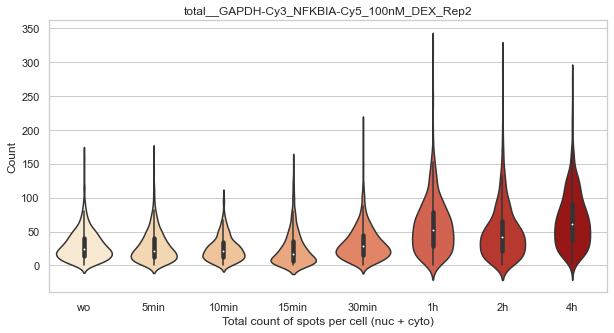

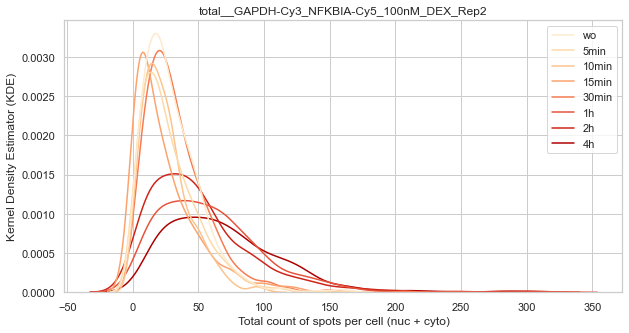

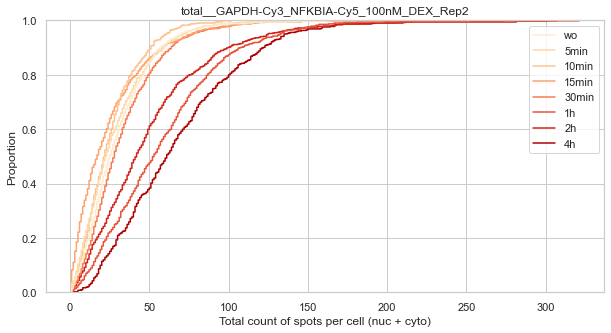

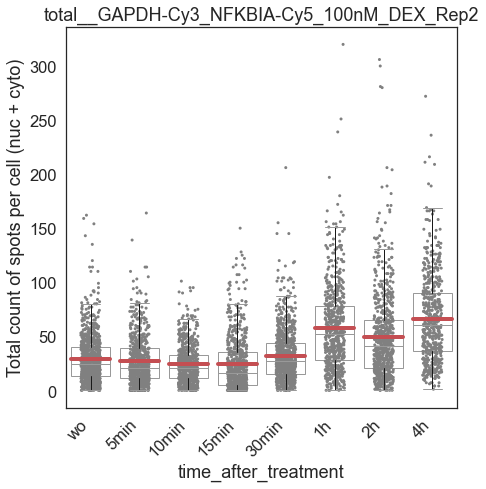

In [23]:
# Plotting for cytosol and nucleus
plot_title_complete = 'all_spots__'+plot_title_subfix
dist_plots(df_total, plot_title_complete,destination_folder)


In [ ]:
# Plotting for all Cytosol only
dist_plots(df_cyto, plot_title='cyto__'+plot_title)

In [ ]:
# Plotting for all nucleus
dist_plots(df_nuc, plot_title='nuc__'+plot_title)

In [ ]:
# Plotting for TS
dist_plots(df_transcription_sites, plot_title='__TS__'+plot_title)

In [ ]:
raise

In [ ]:
plt.figure(figsize=(10,5))
sns.set(font_scale = 1)
sns.set_style("whitegrid")
p_dist =sns.violinplot(data=df, scale="count",palette="OrRd")
p_dist.set_xlabel("Total count of spots per cell (nuc + cyto)")
p_dist.set_ylabel("Count")
p_dist.set_title(plot_title)
#p_dist.set_ylim(-10,max_val)
plt.savefig('Violin__'+plot_title+'.png', transparent=False)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.set(font_scale = 1)
sns.set_style("whitegrid")
p_dist =sns.kdeplot(data=df,palette="OrRd")
p_dist.set_xlabel("Total count of spots per cell (nuc + cyto)")
p_dist.set_ylabel("Kernel Density Estimator (KDE)")
p_dist.set_title(plot_title)
#sns.set(font_scale = 1)
#p_dist.set_xlim(-10,max_val)
plt.savefig('Distributions__'+plot_title+'.png', transparent=False)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.set(font_scale = 1)
sns.set_style("whitegrid")
p_dist =sns.ecdfplot(data=df,palette="OrRd")
p_dist.set_xlabel("Total count of spots per cell (nuc + cyto)")
p_dist.set_ylabel("Proportion")
p_dist.set_title(plot_title)
#p_dist.set_xlim(0,max_val)
plt.savefig('ECDF__'+ plot_title+'.png', transparent=False)
plt.show()

In [ ]:
plt.figure(figsize=(7,7))
sns.set(font_scale = 1.5)
sns.set_style("white")
p = sns.stripplot(data=df, size=3, color='0.5', jitter=0.2)
plt.xticks(rotation=45, ha="right")
sns.set(font_scale = 1.5)
#p.set_ylim(0,max_val)
bp=sns.boxplot( 
            meanprops={'visible': True,'color': 'r', 'ls': 'solid', 'lw': 4},
            #medianprops={'visible': False,'color': 'orangered', 'ls': 'solid', 'lw': 1},
            whiskerprops={'visible': True, 'color':'k','ls': 'solid', 'lw': 1},
            data=df,
            showcaps={'visible': False, 'color':'orangered', 'ls': 'solid', 'lw': 1}, # Q1-Q3 25-75%
            ax=p,
            showmeans=True,meanline=True,zorder=10,showfliers=False,showbox=True,linewidth=1,color='w')
p.set_xlabel("time_after_treatment")
p.set_ylabel("Total count of spots per cell (nuc + cyto)")
p.set_title(plot_title)
sns.set(font_scale = 1.5)
plt.savefig('BarPlots__'+plot_title+'.png', transparent=False)
plt.show()

# Moving plots to a final folder "comparing_distributions"

In [ ]:
# create results folder
destination_folder = 'dist_'+plot_title+'__'+mandatory_substring

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

plot_names = ['Violin__'+plot_title+'.png',
'Distributions__'+plot_title+'.png',
'BarPlots__'+plot_title+'.png',
'ECDF__'+plot_title+'.png']

#figure_path 
for name_plot in plot_names:
    pathlib.Path().absolute().joinpath(name_plot).rename(pathlib.Path().absolute().joinpath(destination_folder,name_plot))

In [ ]:
# remove temporary folder
shutil.rmtree(local_folder_path)